# Exploratory Data Analysis (EDA) for Credit Risk Modeling

This notebook performs exploratory data analysis (EDA) on the Xente transaction dataset (~96,000 rows) to understand its structure, identify patterns, and inform feature engineering for the credit risk model. The analysis includes data loading, summary statistics, visualizations, correlation analysis, missing value handling, and outlier detection, following best practices from the *Credit Risk Analysis and Modeling* presentation.

## Objectives
- Understand the dataset's structure and variable meanings using *Xente Variable Definitions*.
- Analyze distributions of numerical (`Amount`, `Value`) and categorical (`ProductCategory`, `ChannelId`, etc.) features.
- Extract and visualize temporal features from `TransactionStartTime`.
- Investigate correlations, missing values, and outliers.
- Summarize 3–5 actionable insights for feature engineering and proxy variable creation.

## Color Scheme Legend
- **Blue**: Numerical features (`Amount`, `Value`) – Represents transaction values.
- **Green**: Categorical features (`ProductCategory`, `ChannelId`, `ProviderId`, `PricingStrategy`, `FraudResult`) – Highlights category distributions.
- **Red**: Temporal features (`TransactionHour`, `TransactionDay`, `TransactionMonth`) – Indicates time-based patterns.
- **Purple**: Correlation heatmaps and outlier detection – Emphasizes relationships and anomalies.


## 1. Import Libraries and Load Data

Load the transaction dataset and variable definitions to understand the data structure.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

%matplotlib inline
sns.set_style('whitegrid')

# Ensure plots directory exists
os.makedirs('../plots', exist_ok=True)

# Define color scheme
COLOR_NUMERICAL = 'blue'
COLOR_CATEGORICAL = 'green'
COLOR_TEMPORAL = 'red'
COLOR_SPECIAL = 'purple'

# Load data
df = pd.read_csv('../data/raw/data.csv')
var_defs = pd.read_csv('../data/raw/xente_variable_definitions.csv')

# Display first few rows
print('Transactions Data (first 5 rows):')
display(df.head())
print('Variable Definitions:')
display(var_defs)


Transactions Data (first 5 rows):


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


Variable Definitions:


,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


## 2. Data Overview

Examine the dataset's structure, data types, and unique values to understand its scope and prepare for RFM analysis.


In [2]:
# Data types and info
print('Data Info:')
df.info()

# Number of unique values per column
print('\nUnique Values:')
for col in df.columns:
    print(f'{col}: {df[col].nunique()} unique values')

# Number of unique customers for RFM analysis
print(f'\nNumber of unique customers: {df["CustomerId"].nunique()}')


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudRes

## 3. Summary Statistics

Compute summary statistics for numerical and categorical features to understand distributions and identify potential issues.


In [3]:
# Numerical features
numerical_cols = ['Amount', 'Value']
print('Numerical Features Summary:')
display(df[numerical_cols].describe())

# Categorical features
categorical_cols = ['ProductCategory', 'ChannelId', 'ProviderId', 'PricingStrategy', 'FraudResult']
print('Categorical Features Counts:')
for col in categorical_cols:
    print(f'\n{col}:')
    display(df[col].value_counts())


Numerical Features Summary:


,Amount,Value
count,9.566200e+04,9.566200e+04
mean,6.717846e+03,9.900584e+03
std,1.233068e+05,1.231221e+05
min,-1.000000e+06,2.000000e+00
25%,-5.000000e+01,2.750000e+02
50%,1.000000e+03,1.000000e+03
75%,2.800000e+03,5.000000e+03
max,9.880000e+06,9.880000e+06


Categorical Features Counts:

ProductCategory:


ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


ChannelId:


ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


ProviderId:


ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64


PricingStrategy:


PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64


FraudResult:


FraudResult
0    95469
1      193
Name: count, dtype: int64

## 4. Distribution of Numerical Features

Visualize distributions of `Amount` and `Value` (in blue) to identify skewness and potential outliers. Extract and visualize temporal features (in red) from `TransactionStartTime`.


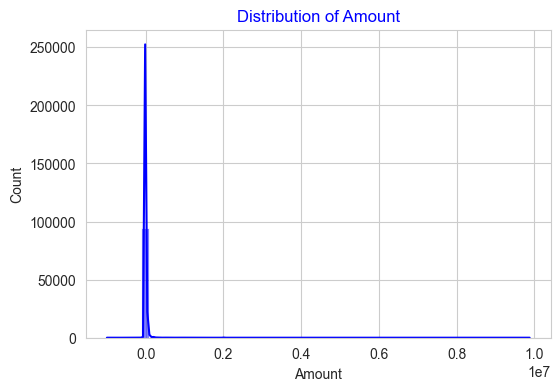

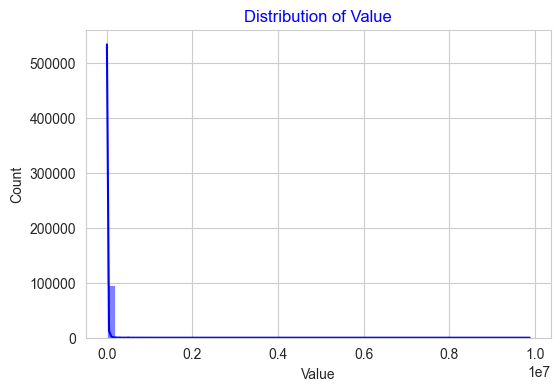

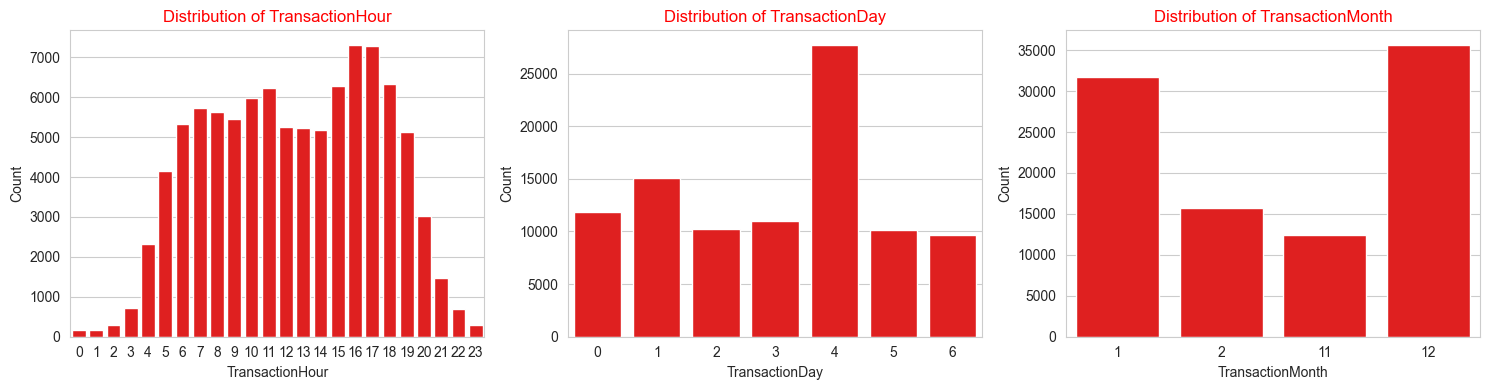

In [4]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract temporal features
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.dayofweek
df['TransactionMonth'] = df['TransactionStartTime'].dt.month

# Plot Amount histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['Amount'], bins=50, kde=True, color=COLOR_NUMERICAL)
plt.title('Distribution of Amount', color=COLOR_NUMERICAL)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.savefig('../plots/amount_dist.png', bbox_inches='tight')
plt.show()

# Plot Value histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['Value'], bins=50, kde=True, color=COLOR_NUMERICAL)
plt.title('Distribution of Value', color=COLOR_NUMERICAL)
plt.xlabel('Value')
plt.ylabel('Count')
plt.savefig('../plots/value_dist.png', bbox_inches='tight')
plt.show()

# Plot temporal features
temporal_cols = ['TransactionHour', 'TransactionDay', 'TransactionMonth']
plt.figure(figsize=(15, 4))
for i, col in enumerate(temporal_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df, color=COLOR_TEMPORAL)
    plt.title(f'Distribution of {col}', color=COLOR_TEMPORAL)
    plt.xlabel(col)
    plt.ylabel('Count')
    if col == 'TransactionHour':
        plt.savefig('../plots/transaction_hour_dist.png', bbox_inches='tight')
plt.tight_layout()
plt.show()


## 5. Distribution of Categorical Features

Visualize counts of categorical features (in green) to identify imbalances and dominant categories.


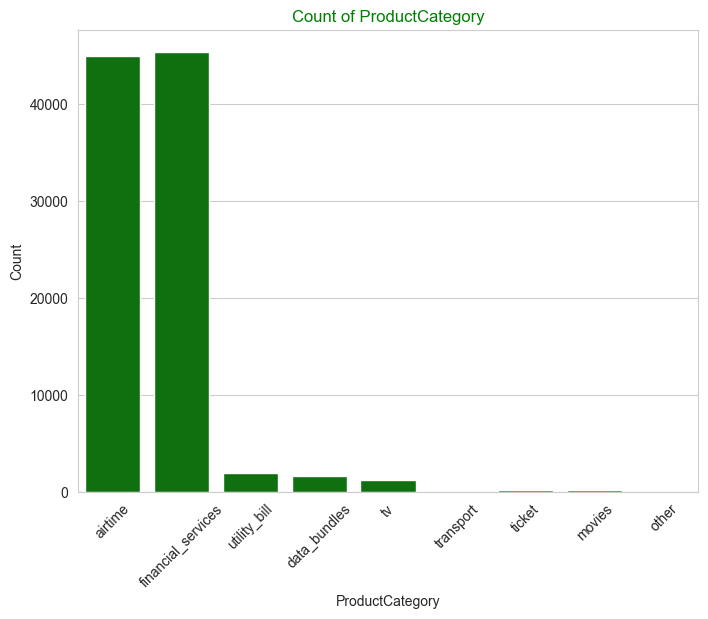

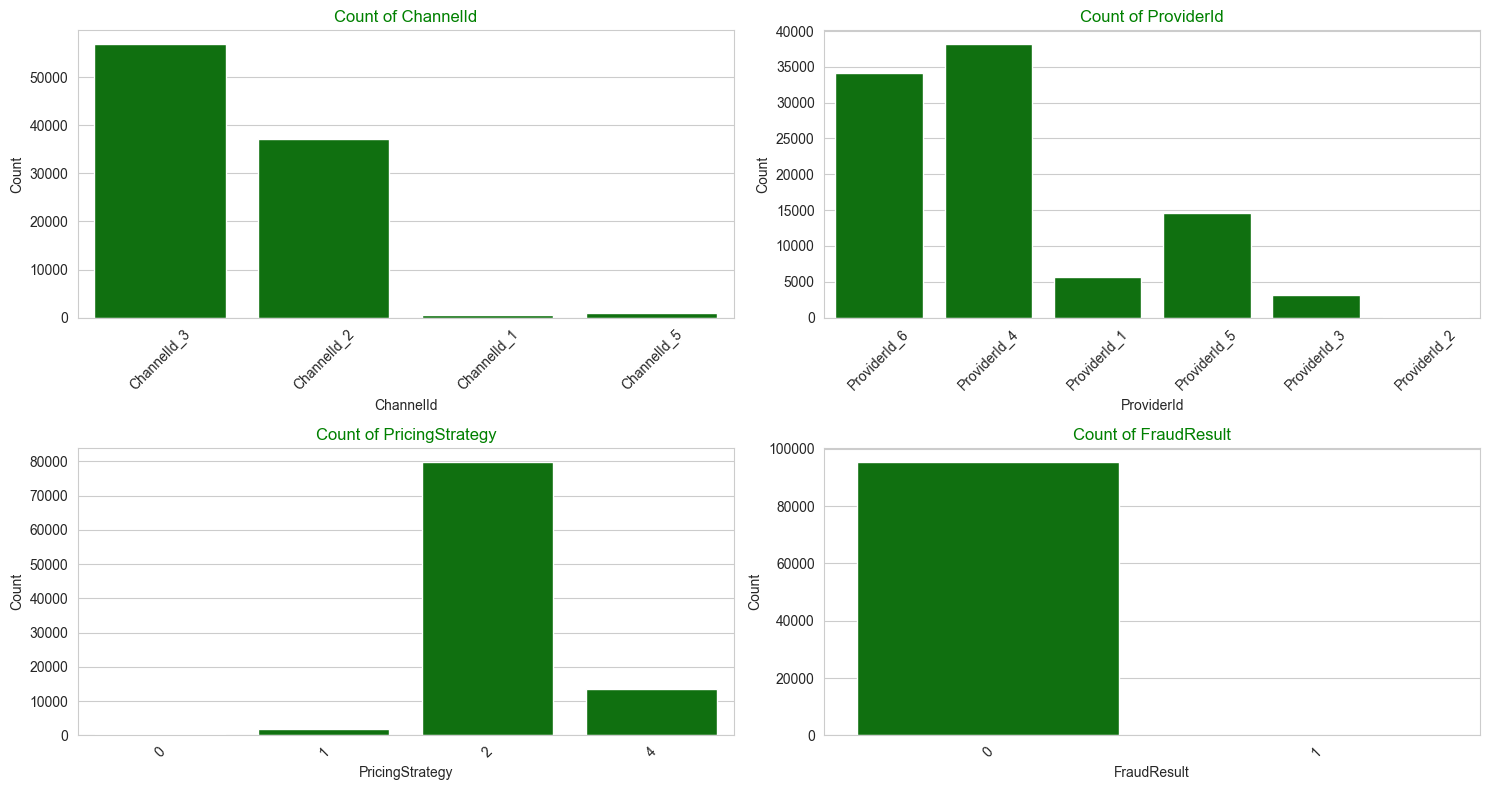

In [5]:
# Plot ProductCategory count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='ProductCategory', data=df, color=COLOR_CATEGORICAL)
plt.title('Count of ProductCategory', color=COLOR_CATEGORICAL)
plt.xlabel('ProductCategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('../plots/product_category_counts.png', bbox_inches='tight')
plt.show()

# Plot other categorical features
other_categorical_cols = ['ChannelId', 'ProviderId', 'PricingStrategy', 'FraudResult']
plt.figure(figsize=(15, 8))
for i, col in enumerate(other_categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, color=COLOR_CATEGORICAL)
    plt.title(f'Count of {col}', color=COLOR_CATEGORICAL)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6. Correlation Analysis

Analyze correlations between numerical and temporal features using a heatmap (in purple) to detect multicollinearity.


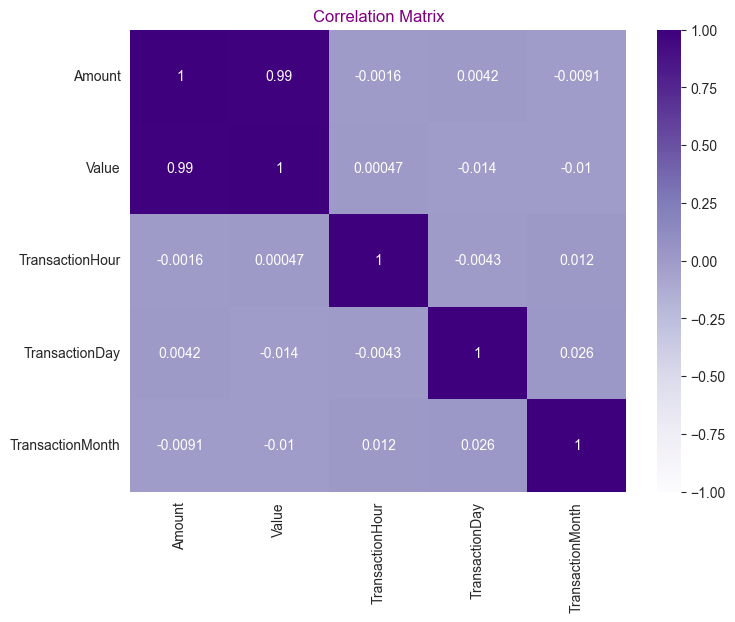

In [6]:
# Correlation matrix
corr_cols = numerical_cols + ['TransactionHour', 'TransactionDay', 'TransactionMonth']
corr_matrix = df[corr_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', vmin=-1, vmax=1)
plt.title('Correlation Matrix', color=COLOR_SPECIAL)
plt.savefig('../plots/correlation_heatmap.png', bbox_inches='tight')
plt.show()


## 7. Missing Values

Identify missing values and propose handling strategies.


In [7]:
# Check missing values
print('Missing Values:')
display(df.isnull().sum())

# Propose handling strategies
print('Handling Strategies:')
print('- Numerical (Amount, Value): Impute with median to handle outliers (not needed, as no missing values).')
print('- Categorical (ProductCategory, ChannelId, etc.): Impute with mode or create "missing" category (not needed, as no missing values).')
print('- No missing values detected in the dataset, simplifying preprocessing.')
print('- If future data includes missing values (e.g., as seen in Data-2 snippet), apply imputation for `CountryCode` with mode (256).')


Missing Values:


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
TransactionHour         0
TransactionDay          0
TransactionMonth        0
dtype: int64

Handling Strategies:
- Numerical (Amount, Value): Impute with median to handle outliers (not needed, as no missing values).
- Categorical (ProductCategory, ChannelId, etc.): Impute with mode or create "missing" category (not needed, as no missing values).
- No missing values detected in the dataset, simplifying preprocessing.
- If future data includes missing values (e.g., as seen in Data-2 snippet), apply imputation for `CountryCode` with mode (256).


## 8. Outlier Detection

Identify outliers in numerical features using box plots (in purple).


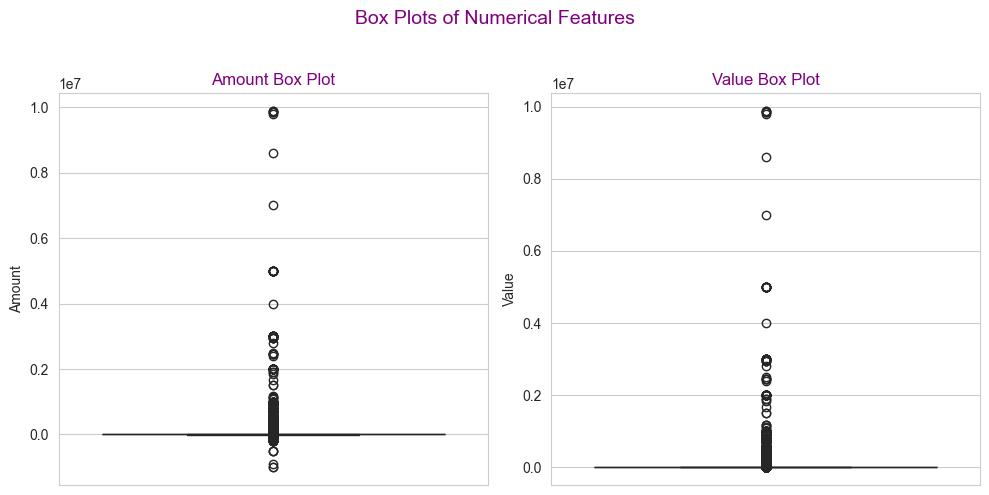

Amount Outliers: 24441 rows outside [-4325.0, 7075.0]
Value Outliers: 9021 rows outside [-6812.5, 12087.5]
Outlier Handling:
- Cap outliers at 1.5*IQR to reduce impact on model training.
- Alternatively, apply log transformation to `Amount` and `Value` to handle skewness.


In [9]:
# --- Combined Boxplots for Amount and Value ---
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col], color=COLOR_SPECIAL)
    plt.title(f'{col} Box Plot', color=COLOR_SPECIAL)
    plt.ylabel(col)

plt.suptitle('Box Plots of Numerical Features', color=COLOR_SPECIAL, fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.savefig('../plots/amount_boxplot.png', bbox_inches='tight')  # Save as one file
plt.show()

# Calculate IQR for outlier detection
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f'{col} Outliers: {len(outliers)} rows outside [{lower_bound}, {upper_bound}]')

# Propose handling strategies
print('Outlier Handling:')
print('- Cap outliers at 1.5*IQR to reduce impact on model training.')
print('- Alternatively, apply log transformation to `Amount` and `Value` to handle skewness.')


## 9. Actionable Insights

Based on the EDA, the following insights will guide feature engineering and proxy variable creation for the credit risk model:
1. **Dominant Product Categories**: `financial_services` (45,405 transactions) and `airtime` (45,027 transactions) dominate the dataset, indicating these categories are critical for RFM analysis to assess customer engagement and creditworthiness.
2. **High Variability in `Amount`**: The standard deviation of `Amount` (123,306.8) is high, with values ranging from -1,000,000 to 9,880,000, suggesting significant outliers that may skew model performance. Capping or log-transforming `Amount` will be necessary.
3. **Temporal Patterns**: Transaction activity varies by hour, day, and month, with `TransactionHour` showing potential behavioral patterns (e.g., peak activity in early morning). These features should be included in feature engineering.
4. **FraudResult Imbalance**: Only 193 transactions (0.2%) are flagged as fraudulent (`FraudResult=1`), indicating it’s not a reliable proxy for default but may inform risk patterns. RFM-based clustering is more suitable for the proxy variable.
5. **No Missing Values**: The dataset has no missing values, simplifying preprocessing. However, future datasets (e.g., similar to Data-2) may require imputation for `CountryCode` or other fields.
